In [1]:
from PIL import Image as im
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from scipy import ndimage
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
%matplotlib inline
## Check if it is binary or logical
import cv2 

## Chord Length Distribution

Chord length distribution (CLD) is one of the widely used methods to statistically represent the microstructure. The main reason for selecting CLD over other methods is chord length distribution has low computational cost and it contains grain size, shape distribution and their anisotropy information which are the main information to extract from our samples.

Chords are defined as the line segments within grains whose endpoints lie at the grain boundaries. Length of each chord is defined as chord length, and the probability of finding a chord with a specified length is quantified by CLD

<img src="Picture1.png">

# Chord Length Distribution  calculation for Dummy microstructure

Let's first start with an easy 50x50 microstructure to understand the general concept of the chord length distribution calculation. Although this type of microstructure may not resemble a physical system, it provides solutions that give some intuitive understanding of chord length distribution.

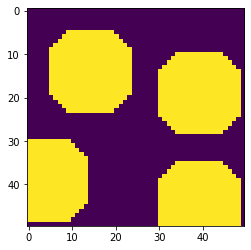

In [2]:
# First Import the Chord Lentgh distribution function
from CLD import CLD

# then load and visaulize the dummy microstructure
img = cv2.imread('bwimage.tiff')
img=img[:,:,1]
imgplot = plt.imshow(img)


In [3]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
     

In [4]:
# Then calculate the chord Length distribtuion in one of the orthogonal direction
aa=CLD(img,'x')

In [5]:
print(aa[0])
len(aa[0])

[ 0  0  0  0  0  0  0  0  0  2  7  2  7 11  5  0  5  0 33  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]


49

<BarContainer object of 49 artists>

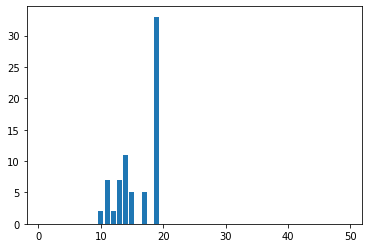

In [6]:
plt.bar(np.arange(1,len(aa[0])+1),aa[0])

In [7]:
np.arange(1,len(aa[0]))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

# Calculate the CLD for a real Microstructure
Dummy microstructure can help us understand the general concept for calculating the chord length distribution,however obtaining CLD for real microstructure is crucial to visualize how CLD captures the information for a real microstructure.

(986, 1376)

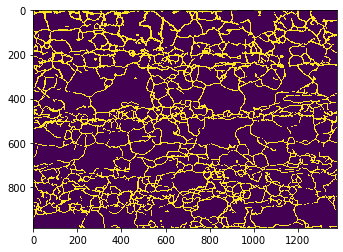

In [8]:
img=cv2.imread('image.tiff')
img=img[:,:,1]

imgplot = plt.imshow(img)

np.shape(img)

In [9]:
# Then calculate the chord Length distribtuion in one of the orthogonal direction
CLD_img=CLD(img,'x')

(0.0, 200)

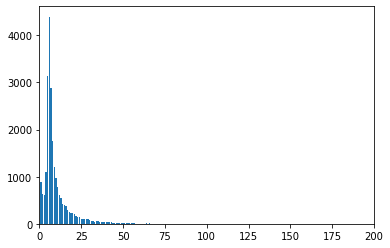

In [10]:
plt.bar(np.arange(1,len(CLD_img[0])+1),CLD_img[0])
plt.xlim([0.0, 200])

# References
[1] Popova, E., Rodgers, T.M., S.R. Kalidindi et al. Integr Mater Manuf Innov (2017) 6: 54. https://doi.org/10.1007/s40192-017-0088-1

# Test cases

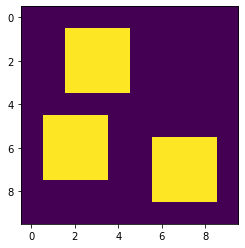

In [11]:
## Test set
A1 = np.array([[0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,1,1,1,0,0,0,0,0,0],
              [0,1,1,1,0,0,1,1,1,0],
              [0,1,1,1,0,0,1,1,1,0],
              [0,0,0,0,0,0,1,1,1,0],
              [0,0,0,0,0,0,0,0,0,0]])
plt.imshow(A1)

In [12]:
CLDt1=CLD(A1,'x')

In [13]:
CLDt1

(array([0, 0, 9, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]))

(0.0, 6)

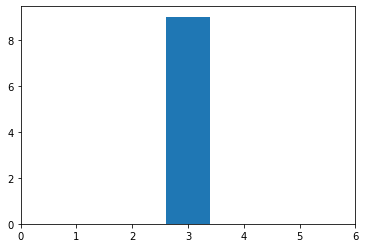

In [14]:
plt.bar(np.arange(1,len(CLDt1[0])+1),CLDt1[0])
plt.xlim([0.0, 6])

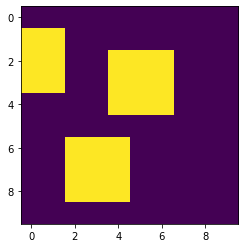

In [15]:
A2 = np.array([[0,0,0,0,0,0,0,0,0,0],
              [1,1,0,0,0,0,0,0,0,0],
              [1,1,0,0,1,1,1,0,0,0],
              [1,1,0,0,1,1,1,0,0,0],
              [0,0,0,0,1,1,1,0,0,0],
              [0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0]])
plt.imshow(A2)

In [16]:
CLDt2=CLD(A2,'x')

In [17]:
CLDt2

(array([0, 3, 6, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]))